In [1]:
#import libraries
import numpy as np #statistical 
import pandas as pd #data frame numbers . head/tail 
from scipy import stats  
import matplotlib.pyplot as plt 
from matplotlib.pyplot import pie, show
import seaborn as sns #visualisation graphs and plots

In [2]:
#import the data
day = pd.read_csv("day.csv") 

In [3]:
#see shape
row, col = day.shape
print(row)
print(col)

731
16


In [4]:
#make a copy
dd = day.copy()

In [5]:
#unify columns 
dd= dd.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'atemp':'feel_temp', 'hum':'humidity', 'cnt':'bike_total'})

In [6]:
#add a column combining casual and registered with written in them casual or registered 
#im not sure if this is a thing that would actually be helpful  

Adapt column content for readability

In [7]:
#change date from object to date time, timestamp
dd['date'] = pd.to_datetime(dd['date']) 

In [8]:
#change season to the word
dd.loc[dd['season'] == 1, 'season'] = 'Winter'
dd.loc[dd['season'] == 2, 'season'] = 'Spring'
dd.loc[dd['season'] == 3, 'season'] = 'Summer'
dd.loc[dd['season'] == 4, 'season'] = 'Fall'

In [9]:
#change year to the actual years 
dd.loc[dd['year'] == 0, 'year'] = '2011' 
dd.loc[dd['year'] == 1, 'year'] = '2012' 

In [10]:
#change the holiday column entry from number to category word 
dd.loc[dd['holiday'] == 0, 'holiday'] = 'No' 
dd.loc[dd['holiday'] == 1, 'holiday'] = 'Yes' 

In [11]:
#create a new column for "weekend" 

dd['weekend'] = dd['weekday'].apply(lambda value: 'no'
if value <= 4 else 'yes')

dd['weekend'].value_counts()

#wanted to use .insert so i could reorganise the column but spent too long trying to figure it out. so we are moving on. 

no     522
yes    209
Name: weekend, dtype: int64

In [12]:
dd['weekday'].value_counts()

#change weekday to the actual days of the week 
dd.loc[dd['weekday'] == 0, 'weekday'] = 'Monday'
dd.loc[dd['weekday'] == 1, 'weekday'] = 'Tuesday'
dd.loc[dd['weekday'] == 2, 'weekday'] = 'Wednesday'
dd.loc[dd['weekday'] == 3, 'weekday'] = 'Thursday'
dd.loc[dd['weekday'] == 4, 'weekday'] = 'Friday'
dd.loc[dd['weekday'] == 5, 'weekday'] = 'Saturday'
dd.loc[dd['weekday'] == 6, 'weekday'] = 'Sunday'

In [13]:
#change working day to words 
dd['workingday'].value_counts()
# 1=workingday 
# 0=weekend  
dd.loc[dd['workingday'] == 0, 'workingday'] = 'No' 
dd.loc[dd['workingday'] == 1, 'workingday'] = 'Yes' 
#we dont know if these non-working days are holidays or not 

In [14]:
#change weathersit to the word
#dd.loc[dd['weathersit'] == 1, 'weathersit'] = 'clear_cloud'
#dd.loc[dd['weathersit'] == 2, 'weathersit'] = 'mist_cloud'
#dd.loc[dd['weathersit'] == 3, 'weathersit'] = 'light_rain_snow'
#dd.loc[dd['weathersit'] == 4, 'weathersit'] = 'heavy_rain_snow'

Change Data Types 

In [15]:
#change season, holiday, and weekday to categorical data 
dd['season']=dd['season'].astype('category')
dd['holiday']=dd['holiday'].astype('category')
dd['weekday']=dd['weekday'].astype('category')
dd['workingday']=dd['workingday'].astype('category')
#dd['weathersit']=dd['weathersit'].astype('category')
dd['year']=dd['year'].astype('category')
dd['weekend']=dd['weekend'].astype('category')

Denormalize the Data 

In [16]:
#normalize humidity 
dd['humidity']=dd['humidity']*100

In [17]:
#normalize windspeed
dd['windspeed']=dd['windspeed']*67

In [18]:
t_min = -8
t_max = +39
dd["temp"] = dd["temp"] * (t_max-t_min) + t_min 

In [19]:
#normalize feel temp 
t_min=-16
t_max=+50 

dd["feel_temp"] = dd["feel_temp"] * (t_max-t_min) + t_min 

EDA

In [20]:
#compare casual riders registered riders 
#weekdays vs weekends  
#registered riders mainly using during the week? aka comuters 
# are casual rider mainly on the weekends?
#wheather inflence daily use 
#season influence on overall use 


In [21]:
# min used 
dd['bike_total'].min()

22

In [22]:
dd['bike_total'].max()

8714

In [23]:
dd['casual'].min()

2

In [24]:
dd['casual'].max()

3410

In [25]:
dd['registered'].min()

20

In [26]:
dd['registered'].max()

6946

In [27]:
#use count 
dd['year'].value_counts() 

2012    366
2011    365
Name: year, dtype: int64

In [28]:
dd.loc[:, :]
# total 17379 rows × 18 columns
# 2011 = row 0 - 8644
# 2012 = row 8645 - 17378

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual,registered,bike_total,weekend
0,1,2011-01-01,Winter,2011,1,No,Sunday,No,2,8.175849,7.999250,80.5833,10.749882,331,654,985,yes
1,2,2011-01-02,Winter,2011,1,No,Monday,No,2,9.083466,7.346774,69.6087,16.652113,131,670,801,no
2,3,2011-01-03,Winter,2011,1,No,Tuesday,Yes,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349,no
3,4,2011-01-04,Winter,2011,1,No,Wednesday,Yes,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562,no
4,5,2011-01-05,Winter,2011,1,No,Thursday,Yes,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,12,No,Friday,Yes,2,3.945849,-1.041628,65.2917,23.458911,247,1867,2114,no
727,728,2012-12-28,Winter,2012,12,No,Saturday,Yes,2,3.906651,0.833036,59.0000,10.416557,644,2451,3095,yes
728,729,2012-12-29,Winter,2012,12,No,Sunday,No,2,3.906651,-0.001600,75.2917,8.333661,159,1182,1341,yes
729,730,2012-12-30,Winter,2012,12,No,Monday,No,1,4.024151,-0.707800,48.3333,23.500518,364,1432,1796,no


In [29]:
#select all the rows that are greater than 

In [30]:
#sum of total bikes used in 2011
dd.loc[dd['year'] == '2011', 'bike_total'].sum()

1243103

In [31]:
#sum of total bikes used in 2012
dd.loc[dd['year'] == '2012', 'bike_total'].sum()

2049576

In [32]:
dd['bike_total'].sum()

3292679

In [33]:
#sum of casual bikes used in 2011
dd.loc[dd['year'] == '2011', 'casual'].sum()

247252

In [34]:
#sum of casual bikes used in 2012
dd.loc[dd['year'] == '2012', 'casual'].sum()

372765

In [35]:
dd['casual'].sum()

620017

In [36]:
#sum of registered bikes used in 2011
dd.loc[dd['year'] == '2011', 'registered'].sum()

995851

In [37]:
#sum of registered bikes used in 2012
dd.loc[dd['year'] == '2012', 'registered'].sum()

1676811

In [38]:
dd['registered'].sum()

2672662

Visualisations 

In [39]:
#breakdown 2011
casual = 
registered = 

labels = ['casual', 'registered']
sizes = [casual, registered]
colors = ['orange', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Casual vs Registered users in 2011') 

SyntaxError: invalid syntax (2176485221.py, line 2)

[Text(0.5, 1.0, 'Weathersit')]

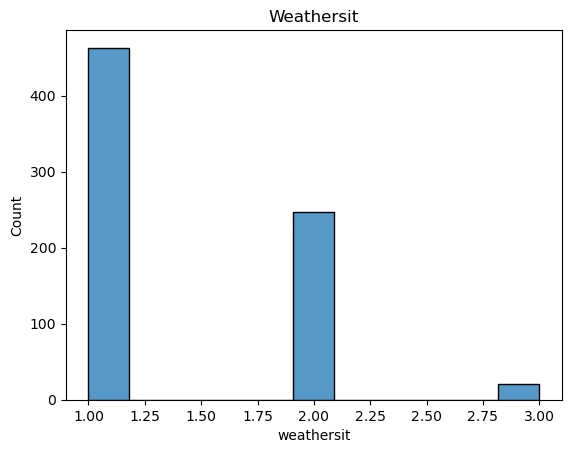

In [ ]:
sns.histplot(x = 'weathersit', data= dd).set(title='Weathersit')

Text(0.5, 1.0, 'Number of rides by registration status per year')

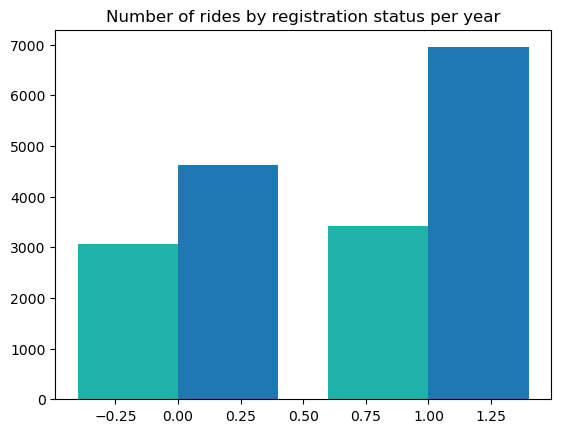

In [ ]:
#casual vs registered, 2011 and 2012  
x = day['yr']
y1 = day['casual']
y2 = day['registered']

plt.bar(x-0.2, y1, width=0.4, color='lightseagreen')
plt.bar(x+0.2, y2, width=0.4)
plt.title("Number of rides by registration status per year")

Text(0.5, 1.0, 'Variance of bike usage depending on weather')

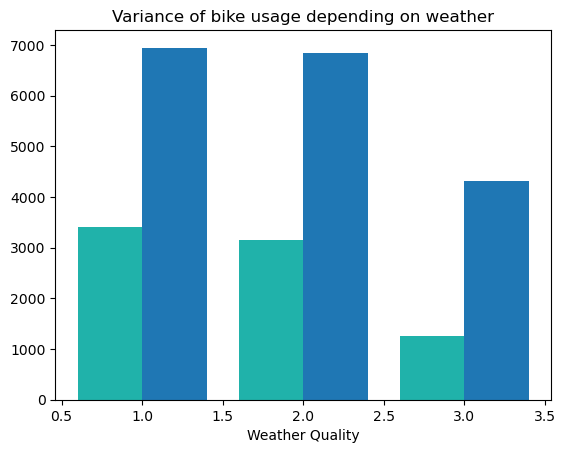

In [41]:
#one eda could show casual vs registered rides by weathersit bar chart. 
x = dd['weathersit']
y1 = dd['casual']
y2 = dd['registered']

plt.bar(x-0.2, y1, width=0.4, color='lightseagreen')
plt.bar(x+0.2, y2, width=0.4)
plt.xlabel("Weather Quality")
plt.title("Variance of bike usage depending on weather")

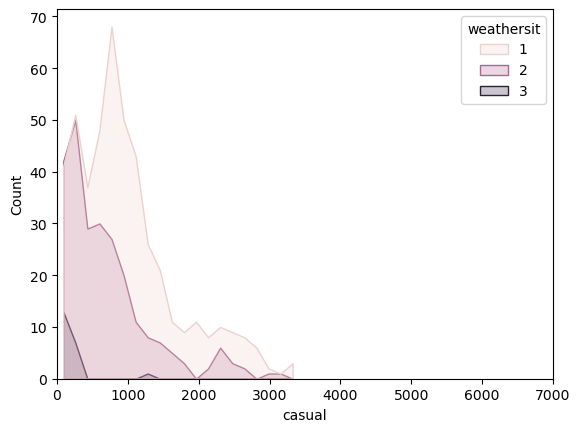

In [ ]:
#try making weathersit the hue
sns.histplot(x = 'casual', data= dd, hue='weathersit', element='poly')
plt.xlim(0, 7000)
plt.show()

<Axes: xlabel='registered', ylabel='Count'>

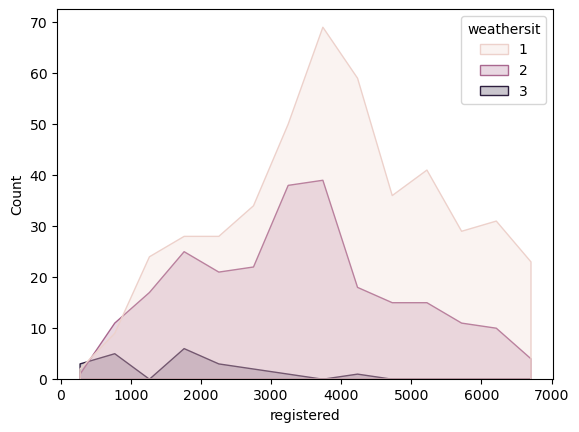

In [ ]:
sns.histplot(x = 'registered', data= dd, hue='weathersit', element='poly')

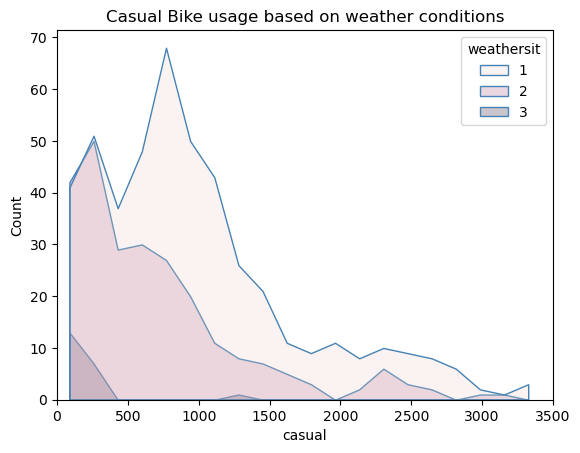

In [54]:
#try making weathersit the hue
sns.histplot(x = 'casual', data= dd, hue='weathersit', element='poly', edgecolor='steelblue')
plt.xlim(0, 3500)
plt.title("Casual Bike usage based on weather conditions")
plt.show()


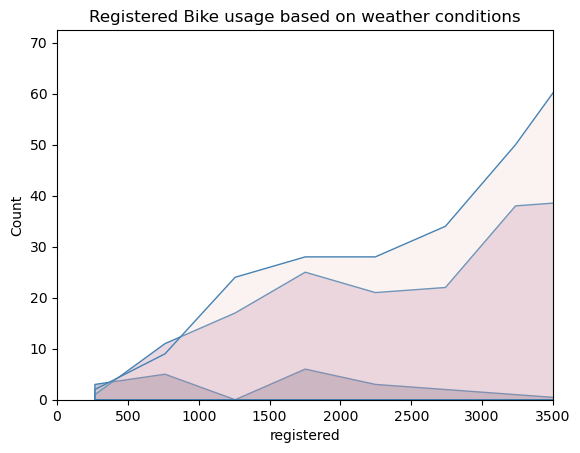

In [55]:
sns.histplot(x = 'registered', data= dd, hue='weathersit', element='poly', edgecolor='steelblue', legend=False)
plt.xlim(0, 3500)
plt.title("Registered Bike usage based on weather conditions")
plt.show()

In [ ]:
#now you could pull out weathersit 2 and only compare those in the same graph 

from the EDA presentation 

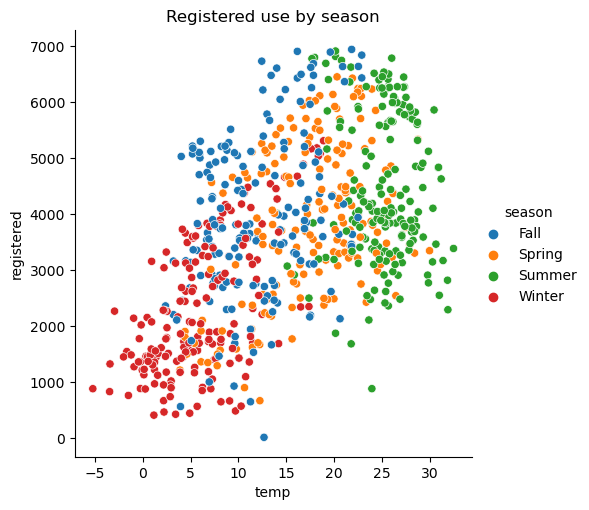

In [ ]:
#compare three things
#sns.relplot(
 #   data=dd,
  #  x="hours", y="registered",
   # hue="year", size="size")

sns.relplot(data=dd, x="temp", y="registered", hue="season").set(title='Registered use by season')

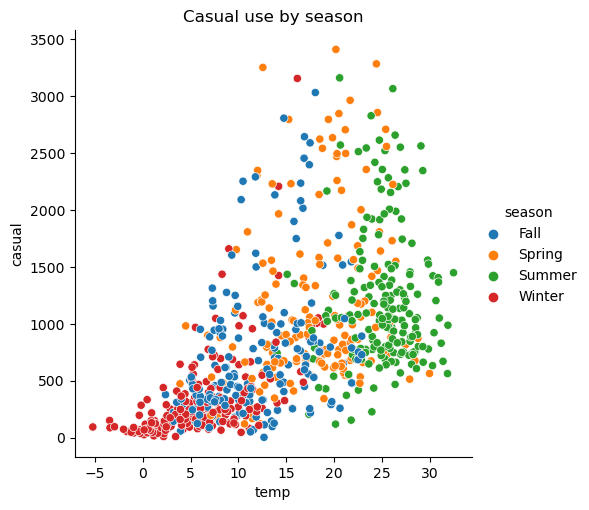

In [ ]:
sns.relplot(data=dd, x="temp", y="casual", hue="season").set(title='Casual use by season')

In [ ]:
#registered by hour


In [ ]:
sns.set_style('white')

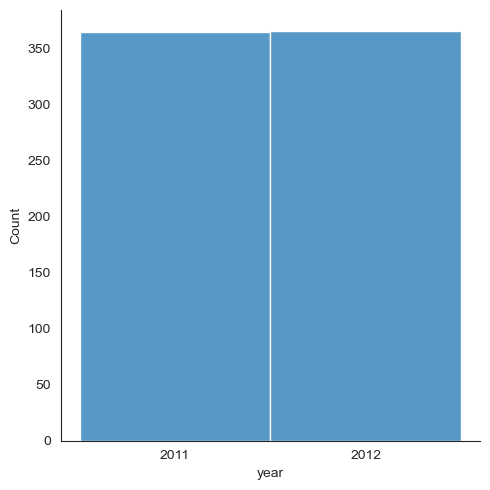

In [ ]:
#try this as a barchart so we can actually see the count change
sns.displot(x='year', data=dd)
#i dont know what this shows me 

[Text(0.5, 1.0, 'Total count of bikes used every hour by year')]

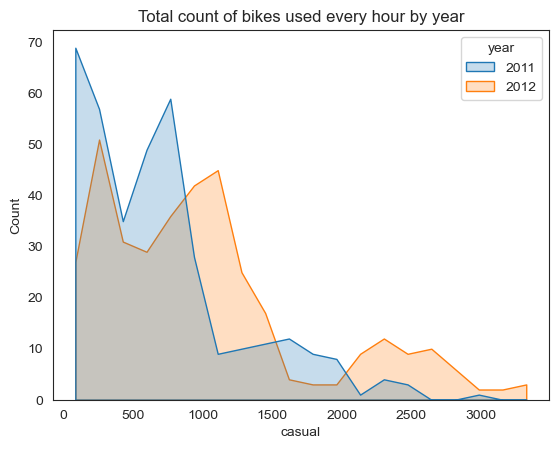

In [ ]:
#bike total count hue year
sns.histplot(x = 'casual', data= dd, hue='year', element='poly').set(title='Total count of bikes used every hour by year')


[Text(0.5, 1.0, 'Total count of bikes used by year')]

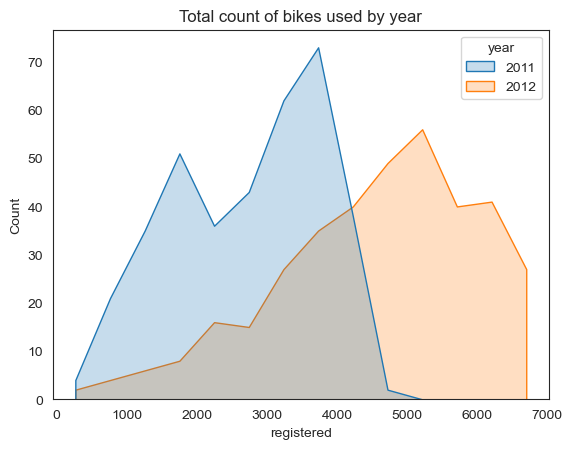

In [ ]:
#bike total count hue year
sns.histplot(x = 'registered', data= dd, hue='year', element='poly').set(title='Total count of bikes used by year')

In [ ]:
#temp comparison 2011 + 12 
#sns.lineplot(x="hour", y="temp",
 #            hue="year",
  #           data=dd)

[Text(0.5, 1.0, 'Temperature comparison 2011 vs 2012')]

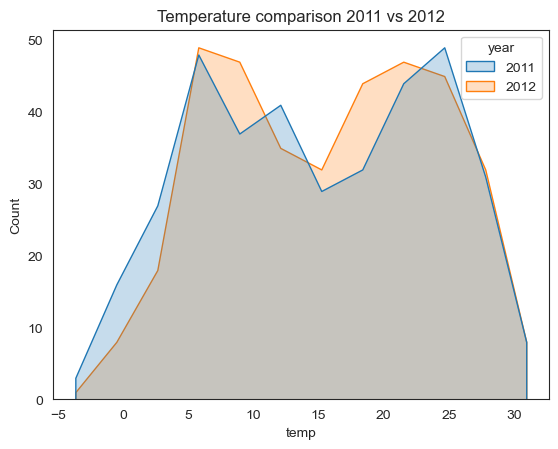

In [ ]:
sns.histplot(x = 'temp', data= dd, hue='year', element='poly').set(title='Temperature comparison 2011 vs 2012')

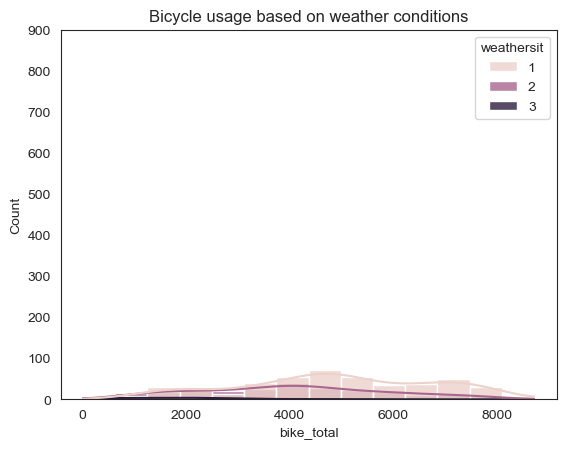

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = 'bike_total', data= dd, ax=ax, kde=True, hue='weathersit', alpha=0.8)
ax.set_ylim(0,900)
plt.title("Bicycle usage based on weather conditions")
plt.show()

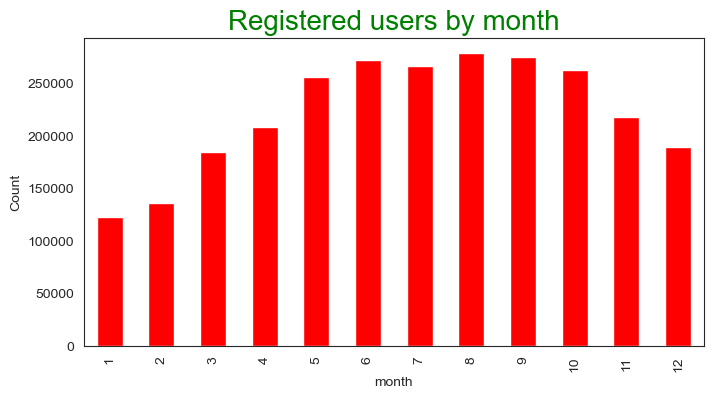

In [ ]:
plt.figure(figsize= (8,4))
dd.groupby("month")["registered"].sum().plot.bar(color="red")
plt.title("Registered users by month", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count")
plt.show()

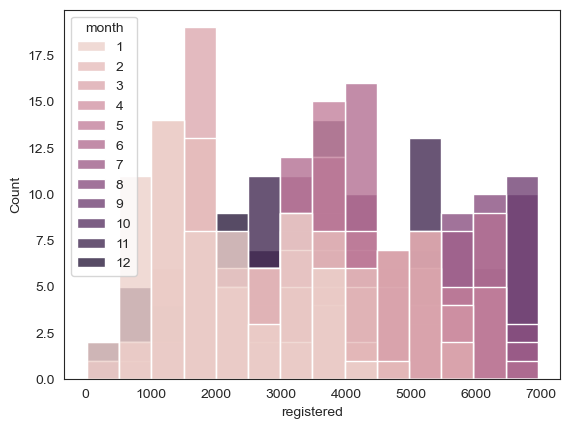

In [ ]:
sns.histplot(x = 'registered', data= dd, hue='month', alpha=0.8)
plt.show()

In [ ]:
#registered users by month 
#sns.histplot(x = 'month', data= dd, kde=True, hue='registered')

In [ ]:
#registration rate by month over a year

#plt.plot(dd['month'], dd['registered'], color='red', marker='o')
#plt.title('title name')
#plt.xlabel('x_axis name')
#plt.ylabel('y_axis name')
#plt.show()

In [ ]:
#average temp in 2011 
#calc. based off a condition 
dd.loc[dd['year'] == '2011', 'temp'].mean()

14.873252604931507

In [ ]:
#average temp in 2012 
dd.loc[dd['year'] == '2012', 'temp'].mean()

15.691797754098362

In [ ]:
dd['weekday'].value_counts()

Monday       105
Sunday       105
Tuesday      105
Friday       104
Saturday     104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64

<Axes: xlabel='bike_total', ylabel='Count'>

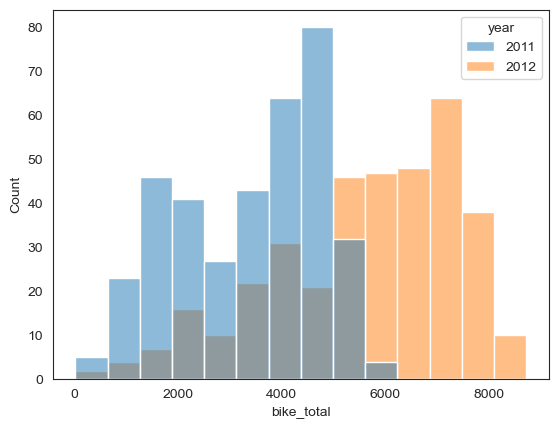

In [ ]:
sns.histplot(x = 'bike_total', data= dd, hue='year') 

In [ ]:
#histogram weekdays 
#missing data - not missing null values 
#might be worth evening out - oversampling - for the machine learning model 
#sns.histplot(x = 'weekday', data= dd, binwidth=0.5) 

In [ ]:
#maybe violin plot for weekdays to show hours used 
#y=hours x = weekdays 
#sns.set_theme(style="whitegrid")

# Compute the correlation matrix and average over networks
#corr_df = df.corr().groupby(level="network").mean()
#corr_df.index = corr_df.index.astype(int)
#corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
#sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
#ax.set(ylim=(-.7, 1.05))
#sns.despine(left=True, bottom=True)

#sns.violinplot(data=dd, palette="Set3", bw=.2, cut=1, linewidth=1)

In [ ]:
#use over time
#sns.histplot(x = 'date', data= dd, hue=) 

In [ ]:
#use count days of the week for casual riders 
#barplot y = count, x = days of the week, hue = casual
#sns.histplot(data = dd, x = 'weekday', hue = registered)
#fix! clearly i cant use barplots with this 


In [ ]:
#weekdays vs weekends 
#2011+2012 stacked colours 

look at possible correlations - heatmap & pairplot 

In [ ]:
# Pair plot of our data variables
#sns.pairplot(data=bikes, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
#plt.show()

C:\Users\lmyhe\AppData\Local\Temp\ipykernel_11860\941340798.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_dd = dd.corr().round(2)


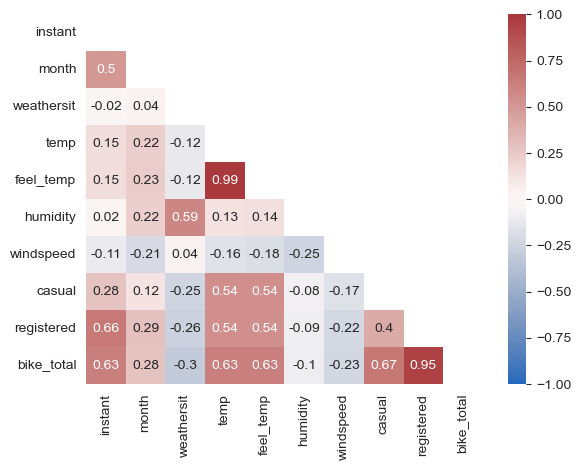

In [ ]:
# Heat
# 
matrix_dd = dd.corr().round(2)
mask = np.triu(np.ones_like(matrix_dd, dtype=bool))
mask
sns.heatmap(matrix_dd, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)
#matrix_dd_1=matrix_dd.unstack()
#matrix_red_01[abs(matrix_red_01) >=0.60]map

#sns.heatmap(dd.corr(), cmap = "vlag", annot = True)
plt.show()

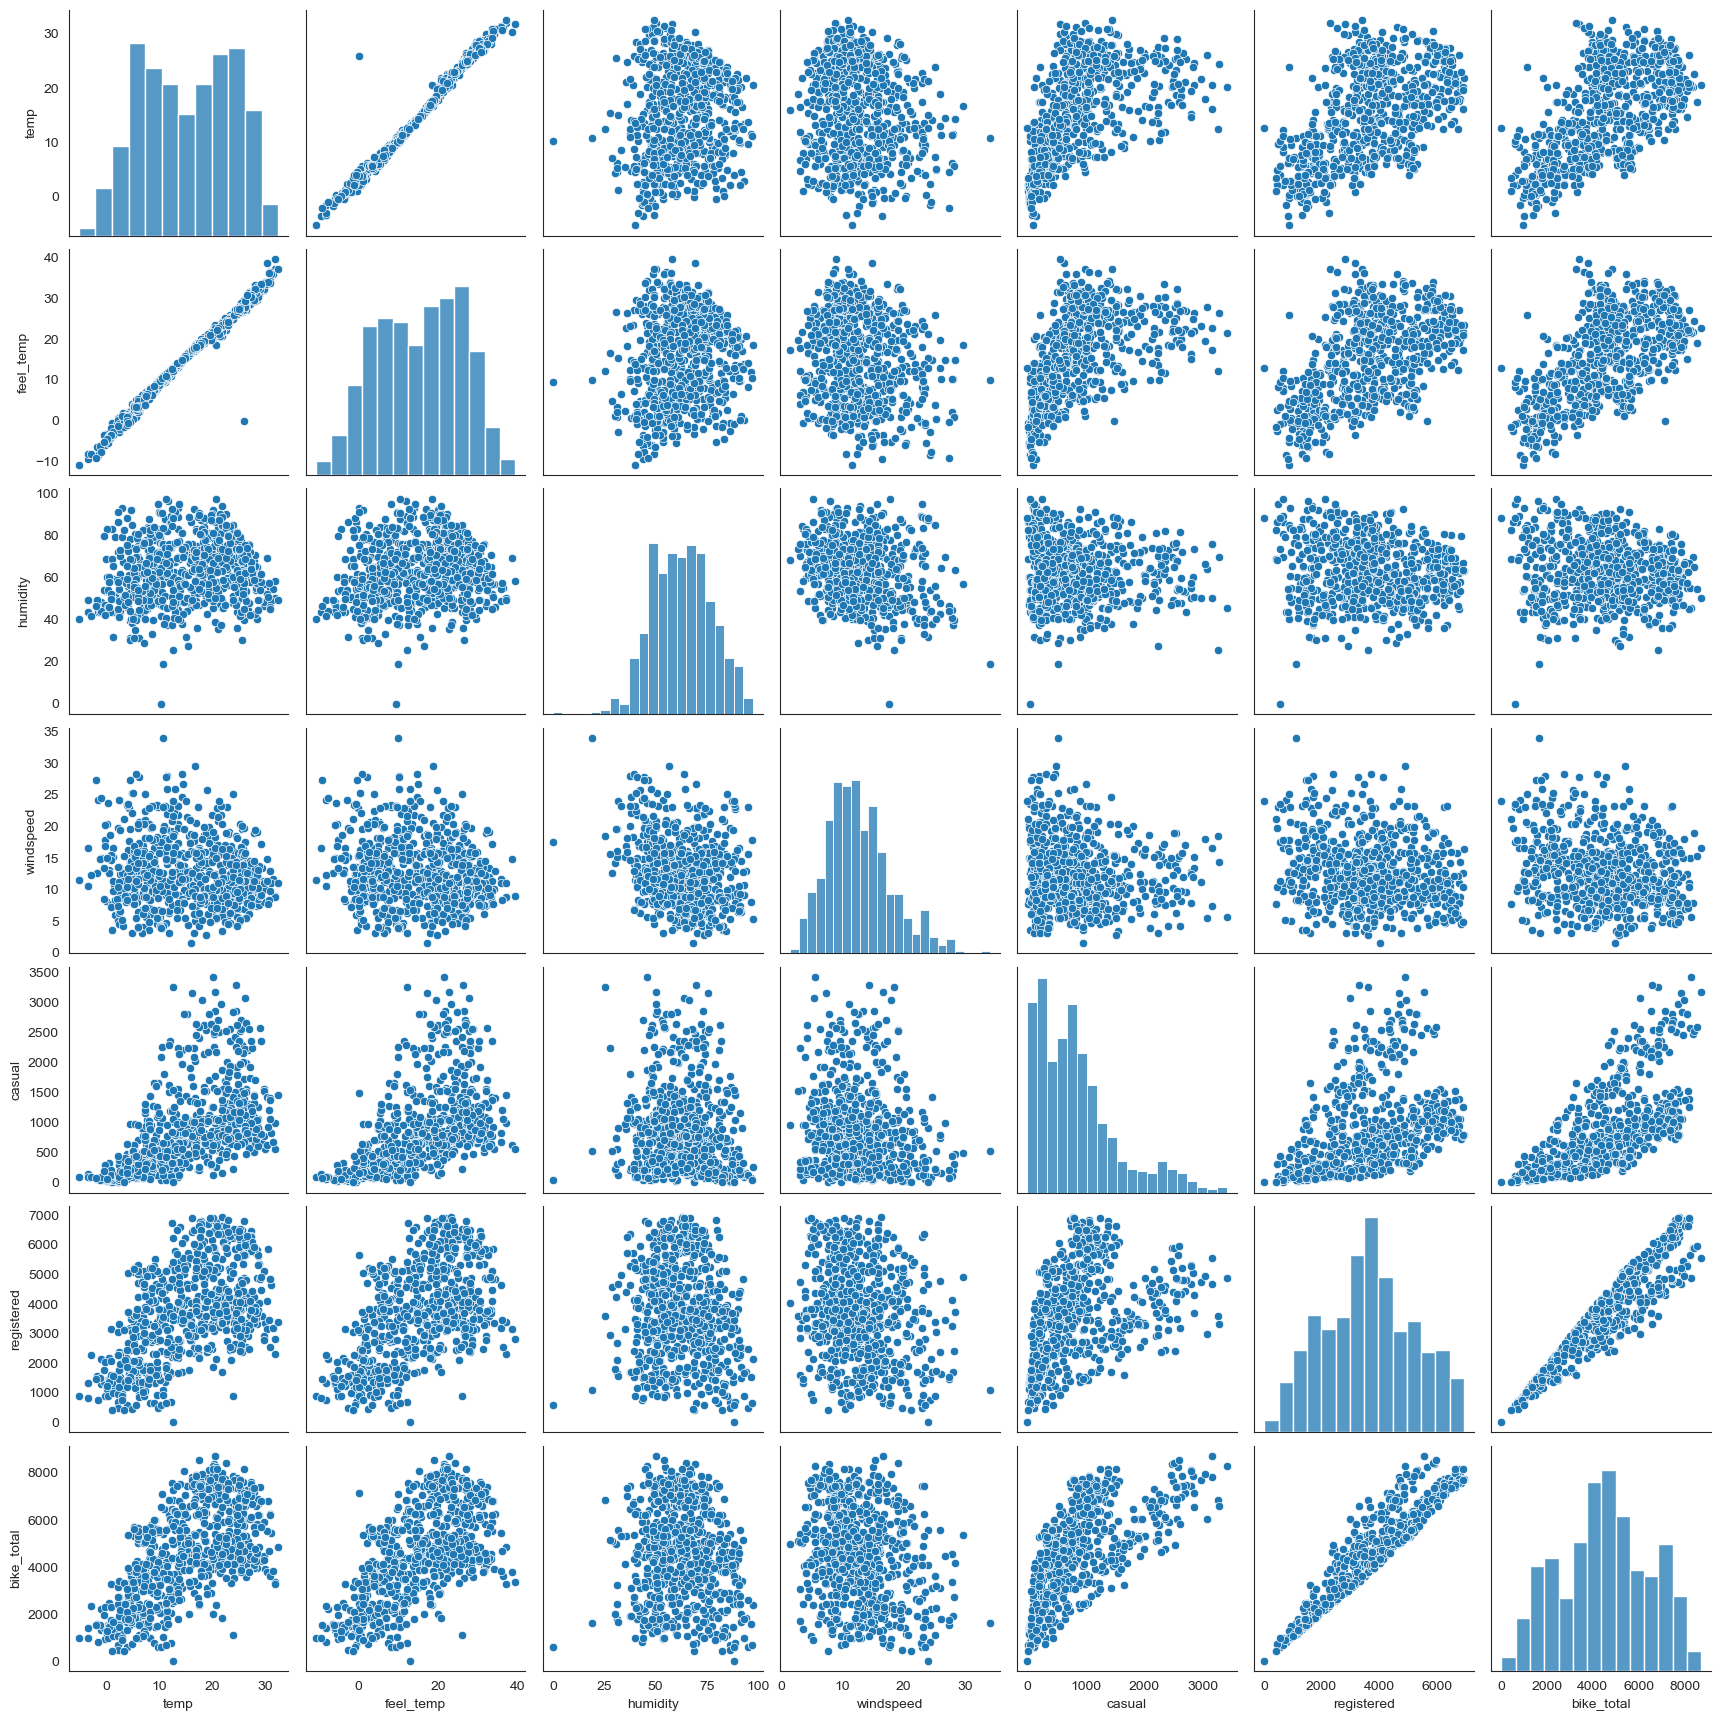

In [ ]:
sns.pairplot(data=dd, vars=["temp", "feel_temp", "humidity", "windspeed", "casual", "registered", "bike_total"])
plt.show()